# Capstone Project-The Battle Of Neighborhoods(Week2)

######  The question is: "which toronto neighborhood is most ideal to start an indian restaurant?"

Relavant code of the project regarding the problem

### Web Scraping,Storing and Preprocessing

Importing libraries

In [1]:
!pip install wikipedia

  Stored in directory: /home/dsxuser/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [2]:
import pandas as pd
import wikipedia as wp

### Scraping the HTML page and storing it to a dataframe

In [3]:

html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

In [4]:
df=pd.read_html(html)[0]

### Head of the DataFrame

In [5]:
df.head(20)

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


### Checking the shape of the DataFrame before Preprocessing

In [6]:
df.shape

(288, 3)

### As we can see from the head of the dataframe, a lot of post codes have unassigned boroughs. These rows are useless for the purpose of our analysis. We will be dropping such rows from the table altogether.

In [7]:
df=df.drop(df[df['Borough']=='Not assigned'].index)

### The dataframe after Dropping

In [8]:
df.head(20)

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


### The shape of the dataframe after dropping

In [9]:
df.shape

(211, 3)

### Resetting the indexes of the Dataframe after Dropping

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.head(20)

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Not assigned
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


### We will now sort the dataframe in the ascending order of the post code

In [12]:
df= df.sort_values(by=['Postcode','Borough','Neighbourhood'], ascending=[1,1,1]).reset_index(drop=True)

df.head(20)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,Malvern
1,M1B,Scarborough,Rouge
2,M1C,Scarborough,Highland Creek
3,M1C,Scarborough,Port Union
4,M1C,Scarborough,Rouge Hill
5,M1E,Scarborough,Guildwood
6,M1E,Scarborough,Morningside
7,M1E,Scarborough,West Hill
8,M1G,Scarborough,Woburn
9,M1H,Scarborough,Cedarbrae


In [13]:
df_new=df
df_new.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,Malvern
1,M1B,Scarborough,Rouge
2,M1C,Scarborough,Highland Creek
3,M1C,Scarborough,Port Union
4,M1C,Scarborough,Rouge Hill


### We observe that there are multiple neighborhoods for the same post code. For example, M1B has two neighborhoods - Malvern and Rouge. For the purpose of our analysis, it is more feasible if we combine such rows together.

In [14]:
df = df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()

df.head(20)

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [15]:
df.shape

(103, 3)

### We now need to check if there is any neighborhood without a relevant value, i.e. check if any neighborhood hasn't been assigned any name.

In [16]:
df = df.drop(df[df['Neighbourhood']=='Not assigned'].index)

In [17]:
print(df[df['Neighbourhood'] == 'Not assigned'])

Empty DataFrame
Columns: [Postcode, Borough, Neighbourhood]
Index: []


### There is one such instance found. To solve this problem, we can simply assign the borough name to that neighborhood. If there were multiple instances, we would have to run an iteration which does this, as shown:

In [18]:
for index, row in df.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']
        
df.tail(20)

,Postcode,Borough,Neighbourhood
82,M6P,West Toronto,"High Park, The Junction South"
83,M6R,West Toronto,"Parkdale, Roncesvalles"
84,M6S,West Toronto,"Runnymede, Swansea"
86,M7R,Mississauga,Canada Post Gateway Processing Centre
87,M7Y,East Toronto,Business Reply Mail Processing Centre 969 Eastern
88,M8V,Etobicoke,"Humber Bay Shores, Mimico South, New Toronto"
89,M8W,Etobicoke,"Alderwood, Long Branch"
90,M8X,Etobicoke,"Montgomery Road, Old Mill North, The Kingsway"
91,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So..."
92,M8Z,Etobicoke,"Kingsway Park South West, Mimico NW, Royal Yor..."


In [31]:
df.shape

(103, 3)

### For the next part of our pre-processing, we will use the information from our second dataset - the geographical co-ordinates of the Toronto neighborhoods - obtained from this link: http://cocl.us/Geospatial_data

In [19]:
df1 = pd.read_csv('http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv')

In [20]:
df1.head(20)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [21]:
df1.shape

(103, 3)

### We will now concatenate this dataframe with our previous dataframe to build a consolidated dataframe of all the information that we require for our analysis.

In [22]:
bigdata = pd.concat([df,df1],axis=1)

bigdata.head(20)

,Postcode,Borough,Neighbourhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,M1J,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",M1K,43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",M1L,43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",M1M,43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",M1N,43.692657,-79.264848


### shape 

In [23]:
bigdata.shape

(103, 6)

###  If we observe the dataframe, we see that there are 2 columns for post codes, one of which can be dropped.

In [24]:
bigdata.drop('Postal Code',axis=1,inplace=True)

### To finish off the pre-processing, we will rename our columns to the following: 'PostalCode','Borough','Neighborhood','Latitude', and 'Longitude'

In [25]:
bigdata.columns = ['PostalCode','Borough','Neighborhood','Latitude','Longitude']

### Head of the DataFrame

In [26]:
bigdata.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Step 2: Exploratory Data Analysis

As per the problem statement, my client has put forth the following criterion which needs to be satisfied:

• The locality or the neighborhood ideally should be situated in Downtown Toronto. The second preference would be West Toronto.

• The neighborhood should not have any restaurant among its top 2 commonly visited places

We can conduct our exploratory data analysis accordingly, to explore Downtown Toronto first, followed by West Toronto.

We will import some prerequisite data visualization libraries such as matplotlib and seaborn.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Let us check how many pin codes are assigned to each Borough of Toronto.

In [28]:
borough_values = bigdata['Borough'].value_counts()

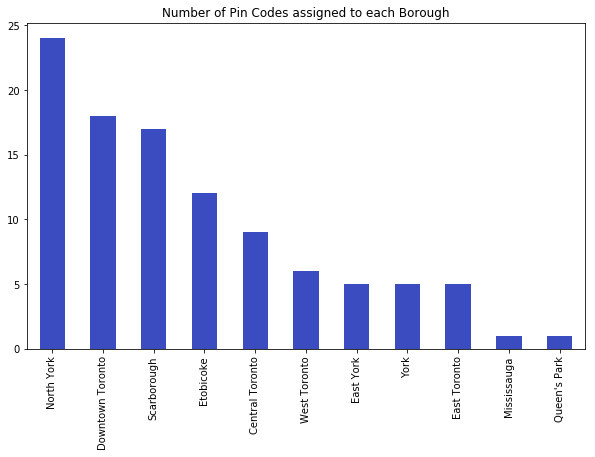

In [47]:
borough_values.plot(kind='bar',title="Number of Pin Codes assigned to each Borough",figsize=(10,6),colormap='coolwarm')

We see that Downtown Toronto is the second largest neighborhood in this list, with just under 20 pin codes. Wonder why the client did not want North York as his preferred neighborhood?

A quick Wikipedia search on Downtown Toronto gives us the answer - with a density of 11725/square kilometers, it is one of the most densely populated areas in North America. We will explore this further when we check the frequently visited places there.

We will now import the required libraries to explore the different neighborhoods of Toronto

In [29]:
!pip install folium

     |████████████████████████████████| 92kB 10.5MB/s eta 0:00:01


In [30]:
from geopy.geocoders import Nominatim

from pandas.io.json import json_normalize

# Importing Matplotlib and associated plotting modules

import matplotlib.cm as cm
import matplotlib.colors as colors

# Importing k-means from the clustering algorithms

from sklearn.cluster import KMeans

#Importing Folium, the map rendering library

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### We will now determine the geographical co-ordinates of Toronto city

In [31]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude

print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


### Let's plot Toronto and the different neighborhoods in our datafram on the map.

In [32]:
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# Adding markers to the map

for lat, lng, borough, Neighborhood in zip(bigdata['Latitude'], bigdata['Longitude'], bigdata['Borough'], bigdata['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### The next step is to define our Foursquare API credentials which we will use further to explore different popular venues in our neighborhoods.

In [33]:
CLIENT_ID = 'OFFGQJUSJPIT3LQ1YXFXZIYNTRCAETMD0H005BXQU1MCC2LS'
CLIENT_SECRET = 'WF30RW4KUWXQEL4IFKKQAZKWJYTPBICVR3QEJNMZWOQPQH4W'
VERSION = '20180604' #Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: OFFGQJUSJPIT3LQ1YXFXZIYNTRCAETMD0H005BXQU1MCC2LS
CLIENT_SECRET:WF30RW4KUWXQEL4IFKKQAZKWJYTPBICVR3QEJNMZWOQPQH4W


### Since the client has asked us to explore Downtown Toronto's neighborhoods as a priority to identify the best possible location for our restaurant, we will shorten our dataframe for analysis accordingly.

In [34]:
downtown_df = bigdata[bigdata['Borough']=='Downtown Toronto']

#Resetting the index

downtown_df.reset_index(drop=True, inplace=True)

#Checking the head of the resulting dataframe

downtown_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


### Let's use the Foursquare API to explore the very first neighborhood of this dataframe.

In [35]:
neighborhood_latitude = downtown_df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = downtown_df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = downtown_df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rosedale are 43.6795626, -79.37752940000001.


In [36]:
LIMIT = 100 #limit of number of venues returned by Foursquare API

radius = 500 #define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=OFFGQJUSJPIT3LQ1YXFXZIYNTRCAETMD0H005BXQU1MCC2LS&client_secret=WF30RW4KUWXQEL4IFKKQAZKWJYTPBICVR3QEJNMZWOQPQH4W&v=20180604&ll=43.6795626,-79.37752940000001&radius=500&limit=100'

In [39]:
import requests

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d2b5651d69ed000385a4b23'},
 'response': {'headerLocation': 'Rosedale',
  'headerFullLocation': 'Rosedale, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 43.6840626045, 'lng': -79.37131878274371},
   'sw': {'lat': 43.675062595499995, 'lng': -79.38374001725632}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bae2150f964a520df873be3',
       'name': 'Mooredale House',
       'location': {'address': '146 Crescent Rd.',
        'crossStreet': 'btwn. Lamport Ave. and Mt. Pleasant Rd.',
        'lat': 43.678630645646535,
        'lng': -79.38009142511322,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.678630645646535,
          'lng': -79.380091425113

### We need to extract the category of the venue. We shall define a function for the same. We can then use this function for the rest of the neighborhoods in Downtown Toronto as well to get the venues.

In [40]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Mooredale House,Building,43.678631,-79.380091
1,Rosedale Park,Playground,43.682328,-79.378934
2,Whitney Park,Park,43.682036,-79.373788
3,Alex Murray Parkette,Park,43.678300,-79.382773
4,Milkman's Lane,Trail,43.676352,-79.373842


In [42]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


We can repeat the same process for all the neighborhoods of Downtown Toronto

In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
toronto_venues = getNearbyVenues(names=downtown_df['Neighborhood'],
                                   latitudes=downtown_df['Latitude'],
                                   longitudes=downtown_df['Longitude']
                                  )

Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
Bathurst Quay, CN Tower, Harbourfront West, Island airport, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie


Let's look at the dataframe obtained after extracting the venues and their categories for each neighborhood from the Foursquare API

In [45]:
toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rosedale,43.679563,-79.377529,Mooredale House,43.678631,-79.380091,Building
1,Rosedale,43.679563,-79.377529,Rosedale Park,43.682328,-79.378934,Playground
2,Rosedale,43.679563,-79.377529,Whitney Park,43.682036,-79.373788,Park
3,Rosedale,43.679563,-79.377529,Alex Murray Parkette,43.678300,-79.382773,Park
4,Rosedale,43.679563,-79.377529,Milkman's Lane,43.676352,-79.373842,Trail
5,"Cabbagetown, St. James Town",43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner
6,"Cabbagetown, St. James Town",43.667967,-79.367675,F'Amelia,43.667536,-79.368613,Italian Restaurant
7,"Cabbagetown, St. James Town",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
8,"Cabbagetown, St. James Town",43.667967,-79.367675,Kingyo Toronto,43.665895,-79.368415,Japanese Restaurant
9,"Cabbagetown, St. James Town",43.667967,-79.367675,Murgatroid,43.667381,-79.369311,Restaurant


In [46]:
toronto_venues.shape

(1292, 7)

How many venues were returned for each neighborhood?

In [69]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
"Bathurst Quay, CN Tower, Harbourfront West, Island airport, King and Spadina, Railway Lands, South Niagara",17,17,17,17,17,17
Berczy Park,58,58,58,58,58,58
"Cabbagetown, St. James Town",43,43,43,43,43,43
Central Bay Street,85,85,85,85,85,85
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16
Church and Wellesley,86,86,86,86,86,86
"Commerce Court, Victoria Hotel",100,100,100,100,100,100


### Step 3: Analyzing the neighborhoods

We will use one-hot encoding for this process.

In [47]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# Adding neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# Moving neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])

toronto_onehot.head()

,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
toronto_onehot.shape

(1292, 206)

In [49]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

toronto_grouped

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.00,0.00,0.0,0.00,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000
1,"Bathurst Quay, CN Tower, Harbourfront West, Is...",0.000000,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.000000,0.000000,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.0,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Cabbagetown, St. James Town",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,...,0.00,0.00,0.0,0.00,0.011765,0.000000,0.000000,0.011765,0.000000,0.011765
5,"Chinatown, Grange Park, Kensington Market",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01,0.00,0.0,0.00,0.060000,0.000000,0.050000,0.010000,0.000000,0.000000
6,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Church and Wellesley,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000,...,0.00,0.00,0.0,0.00,0.000000,0.011628,0.011628,0.000000,0.011628,0.011628
8,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.00,0.00,0.0,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
9,"Design Exchange, Toronto Dominion Centre",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,...,0.00,0.00,0.0,0.01,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000


Extracting the top 5 venues from each neighborhood

In [50]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop  0.07
1                 Café  0.05
2  American Restaurant  0.04
3                  Bar  0.04
4           Steakhouse  0.04


----Bathurst Quay, CN Tower, Harbourfront West, Island airport, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3             Plane  0.06
4           Airport  0.06


----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2    Steakhouse  0.03
3          Café  0.03
4   Cheese Shop  0.03


----Cabbagetown, St. James Town----
                venue  freq
0         Coffee Shop  0.07
1          Restaurant  0.05
2         Pizza Place  0.05
3  Italian Restaurant  0.05
4              Bakery  0.05


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.15
1                Café  0.05
2  Italian Restaurant  0.05
3      Ice Cream Sh

In [51]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Appending the most common venues in each neighborhood

In [52]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

#create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Bar,American Restaurant,Steakhouse,Gym,Burger Joint,Sushi Restaurant,Hotel
1,"Bathurst Quay, CN Tower, Harbourfront West, Is...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Bar,Coffee Shop,Plane,Sculpture Garden,Boutique,Boat or Ferry
2,Berczy Park,Coffee Shop,Cocktail Bar,Café,Beer Bar,Bakery,Seafood Restaurant,Farmers Market,Steakhouse,Cheese Shop,Eastern European Restaurant
3,"Cabbagetown, St. James Town",Coffee Shop,Café,Pub,Italian Restaurant,Park,Bakery,Pizza Place,Restaurant,Japanese Restaurant,Sandwich Place
4,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Sandwich Place,Burger Joint,Chinese Restaurant,Sushi Restaurant,Bar,Japanese Restaurant
5,"Chinatown, Grange Park, Kensington Market",Café,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Bar,Dumpling Restaurant,Chinese Restaurant,Mexican Restaurant,Bakery,Coffee Shop,Arts & Crafts Store
6,Christie,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Coffee Shop,Convenience Store,Nightclub,Restaurant,Diner
7,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Gym
8,"Commerce Court, Victoria Hotel",Coffee Shop,Hotel,Café,American Restaurant,Restaurant,Deli / Bodega,Bakery,Gastropub,Seafood Restaurant,Steakhouse
9,"Design Exchange, Toronto Dominion Centre",Coffee Shop,Café,Hotel,Italian Restaurant,Restaurant,Bar,Gastropub,Deli / Bodega,American Restaurant,Steakhouse


In [53]:
neighborhoods_venues_sorted.shape

(18, 11)

We will now cluster these neighborhoods. For that, the Neighborhood column can be dropped.

In [54]:
!pip install yellowbrick

     |████████████████████████████████| 286kB 12.6MB/s eta 0:00:01


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


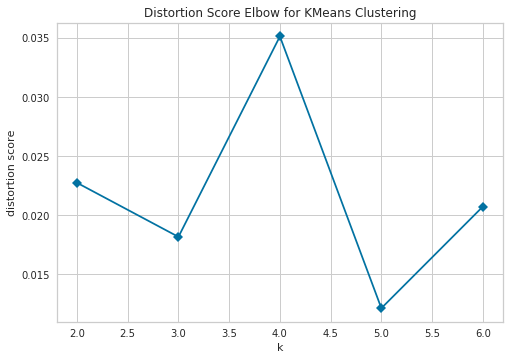

In [55]:
#Using the elbow method to identify the optimal k

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

data = toronto_grouped.drop('Neighborhood', 1)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7), timings=False)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data


In [56]:
# Setting number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [57]:
# Adding clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = downtown_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


toronto_merged.head(20)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0,Park,Playground,Trail,Building,Dim Sum Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,1,Coffee Shop,Café,Pub,Italian Restaurant,Park,Bakery,Pizza Place,Restaurant,Japanese Restaurant,Sandwich Place
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Gym
3,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1,Coffee Shop,Bakery,Park,Mexican Restaurant,Gym / Fitness Center,Breakfast Spot,Restaurant,Pub,Café,Theater
4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Clothing Store,Cosmetics Shop,Fast Food Restaurant,Café,Bubble Tea Shop,Restaurant,Italian Restaurant,Lingerie Store,Ice Cream Shop
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Hotel,Restaurant,Italian Restaurant,Bakery,Beer Bar,Breakfast Spot,Clothing Store,Cocktail Bar
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Café,Beer Bar,Bakery,Seafood Restaurant,Farmers Market,Steakhouse,Cheese Shop,Eastern European Restaurant
7,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,1,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Sandwich Place,Burger Joint,Chinese Restaurant,Sushi Restaurant,Bar,Japanese Restaurant
8,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,1,Coffee Shop,Café,Thai Restaurant,Bar,American Restaurant,Steakhouse,Gym,Burger Joint,Sushi Restaurant,Hotel
9,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,1,Coffee Shop,Hotel,Aquarium,Italian Restaurant,Café,Scenic Lookout,Sporting Goods Shop,Bakery,Brewery,Pizza Place


Dropping rows where there is no data available for the neighborhood, and converting the column Cluster Labels as integer

In [58]:
toronto_merged=toronto_merged.dropna()

In [59]:
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

Visualizing the clusters in the map

In [60]:
# create map
map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Step 4: Understanding the takeaways from the clustering

Let us see the toronto_merged dataframe again, especially noticing how the clusters have been formed.

In [61]:
toronto_merged.sort_values(by = 'Cluster Labels',ascending=True, inplace=False)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0,Park,Playground,Trail,Building,Dim Sum Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant
15,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,1,Coffee Shop,Restaurant,Café,Beer Bar,Seafood Restaurant,Cocktail Bar,Hotel,Lounge,Italian Restaurant,Park
13,M5T,Downtown Toronto,"Chinatown, Grange Park, Kensington Market",43.653206,-79.400049,1,Café,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Bar,Dumpling Restaurant,Chinese Restaurant,Mexican Restaurant,Bakery,Coffee Shop,Arts & Crafts Store
12,M5S,Downtown Toronto,"Harbord, University of Toronto",43.662696,-79.400049,1,Café,Bookstore,Japanese Restaurant,Bar,Bakery,Restaurant,Italian Restaurant,Beer Store,Dessert Shop,Poutine Place
11,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,1,Coffee Shop,Hotel,Café,American Restaurant,Restaurant,Deli / Bodega,Bakery,Gastropub,Seafood Restaurant,Steakhouse
10,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,1,Coffee Shop,Café,Hotel,Italian Restaurant,Restaurant,Bar,Gastropub,Deli / Bodega,American Restaurant,Steakhouse
9,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,1,Coffee Shop,Hotel,Aquarium,Italian Restaurant,Café,Scenic Lookout,Sporting Goods Shop,Bakery,Brewery,Pizza Place
16,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,1,Coffee Shop,Café,Steakhouse,Hotel,Bar,Gym,Asian Restaurant,Deli / Bodega,Bakery,Gastropub
8,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,1,Coffee Shop,Café,Thai Restaurant,Bar,American Restaurant,Steakhouse,Gym,Burger Joint,Sushi Restaurant,Hotel
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Café,Beer Bar,Bakery,Seafood Restaurant,Farmers Market,Steakhouse,Cheese Shop,Eastern European Restaurant


If we notice, the two most common venues in Cluster 0 are predominantly Coffee Shop and Cafe, which can be classified as eateries of some kind. Cluster 2 has a cafe as a commonly visited venue. On the other hand, Clusters 1 and 3 don't have any such venues as the top 2 commonly visited venues.

Cluster 1 and 3 are thus ideal neighborhoods to start an Indian restaurant. We can further drill down to find the best possible neighborhood among the two.

In [62]:
toronto_merged[toronto_merged['Cluster Labels'] == 1]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4X,Downtown Toronto,"Cabbagetown, St. James Town",43.667967,-79.367675,1,Coffee Shop,Café,Pub,Italian Restaurant,Park,Bakery,Pizza Place,Restaurant,Japanese Restaurant,Sandwich Place
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Gym
3,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1,Coffee Shop,Bakery,Park,Mexican Restaurant,Gym / Fitness Center,Breakfast Spot,Restaurant,Pub,Café,Theater
4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Clothing Store,Cosmetics Shop,Fast Food Restaurant,Café,Bubble Tea Shop,Restaurant,Italian Restaurant,Lingerie Store,Ice Cream Shop
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Coffee Shop,Café,Hotel,Restaurant,Italian Restaurant,Bakery,Beer Bar,Breakfast Spot,Clothing Store,Cocktail Bar
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Café,Beer Bar,Bakery,Seafood Restaurant,Farmers Market,Steakhouse,Cheese Shop,Eastern European Restaurant
7,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,1,Coffee Shop,Café,Italian Restaurant,Ice Cream Shop,Sandwich Place,Burger Joint,Chinese Restaurant,Sushi Restaurant,Bar,Japanese Restaurant
8,M5H,Downtown Toronto,"Adelaide, King, Richmond",43.650571,-79.384568,1,Coffee Shop,Café,Thai Restaurant,Bar,American Restaurant,Steakhouse,Gym,Burger Joint,Sushi Restaurant,Hotel
9,M5J,Downtown Toronto,"Harbourfront East, Toronto Islands, Union Station",43.640816,-79.381752,1,Coffee Shop,Hotel,Aquarium,Italian Restaurant,Café,Scenic Lookout,Sporting Goods Shop,Bakery,Brewery,Pizza Place
10,M5K,Downtown Toronto,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,1,Coffee Shop,Café,Hotel,Italian Restaurant,Restaurant,Bar,Gastropub,Deli / Bodega,American Restaurant,Steakhouse


In [63]:
toronto_merged[toronto_merged['Cluster Labels'] == 3]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,M6G,Downtown Toronto,Christie,43.669542,-79.422564,3,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Coffee Shop,Convenience Store,Nightclub,Restaurant,Diner



To better understand the location of these neighborhoods, it's best to explore them visually. Let us explore the neighborhood with the postcode M4W first.

In [64]:
rosedale_df = bigdata[bigdata['PostalCode'] == 'M4W']

rosedale_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
50,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529


In [65]:
map_rosedale = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# Adding markers to the map

for lat, lng, borough, Neighborhood in zip(rosedale_df['Latitude'], rosedale_df['Longitude'], rosedale_df['Borough'], rosedale_df['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rosedale)  
    
map_rosedale

Let us know explore the postcode M5V

As there are multiple neighborhoods for this postcode, we will use the df_new dataframe to explore the neighborhoods.

In [67]:
neigh_df = df_new[df_new['Postcode'] == 'M5V']

neigh_df.head()

,Postcode,Borough,Neighbourhood
121,M5V,Downtown Toronto,Bathurst Quay
122,M5V,Downtown Toronto,CN Tower
123,M5V,Downtown Toronto,Harbourfront West
124,M5V,Downtown Toronto,Island airport
125,M5V,Downtown Toronto,King and Spadina


Since all these neighborhoods have the same latitude and longitudes, we use this information from the bigdata dataframe as in the case of the previous post code.

In [68]:
neigh_df_map = bigdata[bigdata['PostalCode']=='M5V']

neigh_df_map.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
68,M5V,Downtown Toronto,"Bathurst Quay, CN Tower, Harbourfront West, Is...",43.628947,-79.39442


In [69]:
map_neigh = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# Adding markers to the map

for lat, lng, borough, Neighborhood in zip(neigh_df_map['Latitude'], neigh_df_map['Longitude'], neigh_df_map['Borough'], neigh_df_map['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_neigh)  
    
map_neigh

### Part 5: Recommendation to the client

Based on the geographic locations of these two clusters, it is clear the neighborhood Rosedale is located at the heart of Downtown Toronto, whereas the neighborhoods under the postcode M5V are on an isolated patch of Downtown Toronto. This explains why there are limited to no restaurants in that area.

It seems the best possible location to start an Indian restaurant would be the Rosedale neighborhood. All the client's conditions are satisified, and there is very little competition when compared to the other neighborhoods. Plus there is the location advantage with little isolation from the city and a very good connectivity with other places within Downtown Toronto, unlike the neighborhoods of M5V.

However, all of the 6 neighborhoods from the post codes M4W and M5V can be suggested to the client as they all meet the requirements.

M4W - Rosedale

M5V - Bathurst Quay, CN Tower, Harbourfront West, Island airport, King and Spadina